# Predict Heart Attack

Having a set of data, we want to predict a heart attack using classification.
Is the person in question likely to have a heart attack? If yes (1) and if no (0).
Use three methods: SVM , Logistic Regrresion and Decision tree

Let's first import required libraries:


In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

## Load Data From CSV File


In [2]:
my_data = pd.read_csv("Heart.csv", delimiter=",")
my_data[0:5]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:>

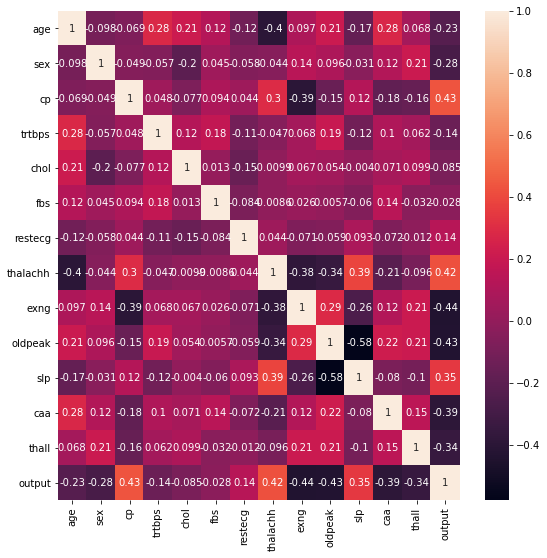

In [3]:
import seaborn as sns
plt.subplots(figsize=(9,9))
sns.heatmap(my_data.corr(),annot=True)



Let's look at the distribution of the classes based on Blood pressure at rest and Maximum heart rate:


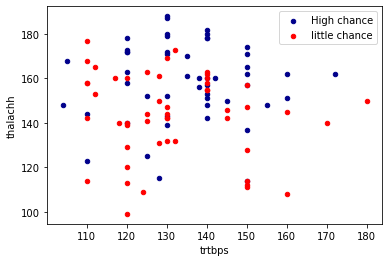

In [114]:
# import pylab
# fig = pylab.figure(figsize=(15,10))
ax = my_data[cell_df['output'] == 1][0:50].plot(kind='scatter', x='trtbps', y='thalachh', color='DarkBlue', label='High chance');
my_data[cell_df['output'] == 0][0:50].plot(kind='scatter', x='trtbps', y='thalachh', color='red', label='little chance', ax=ax);
plt.show()

## Data pre-processing and selection


Let's first look at columns data types:


In [115]:
cell_df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

Let's define X, and y for our dataset:
We use appropriate data

In [116]:
feature_df = my_data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng' , 'caa']]
X = np.asarray(feature_df)

In [117]:
target = my_data['output']
y = np.asarray(target)

Also, we normalize the dataset:

In [118]:
from sklearn import preprocessing
x = preprocessing.StandardScaler()
X = x.fit(X).transform(X)
X[0:5]

array([[ 0.95,  0.68,  1.97,  0.76, -0.26,  2.39, -1.01,  0.02, -0.7 ,
        -0.71],
       [-1.92,  0.68,  1.  , -0.09,  0.07, -0.42,  0.9 ,  1.63, -0.7 ,
        -0.71],
       [-1.47, -1.47,  0.03, -0.09, -0.82, -0.42, -1.01,  0.98, -0.7 ,
        -0.71],
       [ 0.18,  0.68,  0.03, -0.66, -0.2 , -0.42,  0.9 ,  1.24, -0.7 ,
        -0.71],
       [ 0.29, -1.47, -0.94, -0.66,  2.08, -0.42,  0.9 ,  0.58,  1.44,
        -0.71]])

## Train/Test dataset


We split our dataset into train and test set:


In [119]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 10) (242,)
Test set: (61, 10) (61,)


# SVM (Support Vector Machines)

<h2 id="modeling">Modeling (SVM with Scikit-learn)</h2>


In [120]:
from sklearn import svm
kernels = [ 'linear']
for kernel in kernels:
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train) 

After being fitted, the model can then be used to predict new values:


In [121]:
yhat = clf.predict(X_test)
print(yhat[0:20])
print (y_test[0:20])

[1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1]
[1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0]


<h2 id="evaluation">Evaluation</h2>


### confusion matrix

In [122]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [123]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[21  4]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87        25
           1       0.89      0.94      0.92        36

    accuracy                           0.90        61
   macro avg       0.90      0.89      0.90        61
weighted avg       0.90      0.90      0.90        61



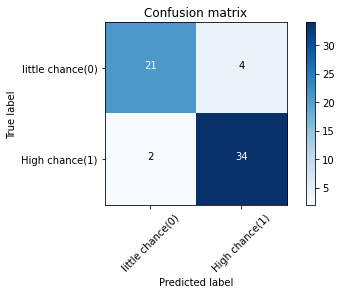

In [124]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['little chance(0)','High chance(1)'],normalize= False,  title='Confusion matrix')

print (classification_report(y_test, yhat))

 **f1\_score** 


In [125]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9009193619849357

jaccard index for accuracy:


In [126]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=1)

0.85

<hr>

<div id=>
    <h2></h2>
    
</div>


# Logistic Regression

<h2 id="modeling">Modeling (Logistic Regression with Scikit-learn)</h2>

In [128]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

### Pridection

In [129]:
yhat = LR.predict(X_test)
print(yhat[0:20])
print(y_test[0:20])

[1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1]
[1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0]


**predict_proba**  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):

In [130]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:20]

array([[0.4 , 0.6 ],
       [0.62, 0.38],
       [0.43, 0.57],
       [0.19, 0.81],
       [0.31, 0.69],
       [0.5 , 0.5 ],
       [0.56, 0.44],
       [0.3 , 0.7 ],
       [0.46, 0.54],
       [0.33, 0.67],
       [0.3 , 0.7 ],
       [0.26, 0.74],
       [0.36, 0.64],
       [0.62, 0.38],
       [0.43, 0.57],
       [0.72, 0.28],
       [0.38, 0.62],
       [0.37, 0.63],
       [0.79, 0.21],
       [0.39, 0.61]])

<h2 id="evaluation">Evaluation</h2>

### confusion matrix

Confusion matrix, without normalization
[[34  2]
 [ 5 20]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        25
           1       0.87      0.94      0.91        36

    accuracy                           0.89        61
   macro avg       0.89      0.87      0.88        61
weighted avg       0.89      0.89      0.88        61



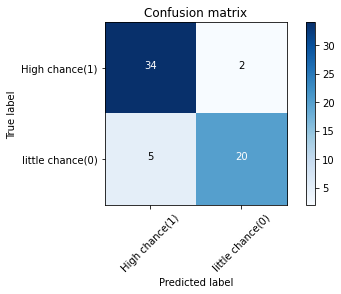

In [131]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['High chance(1)' , 'little chance(0)'],normalize= False,  title='Confusion matrix')
print (classification_report(y_test, yhat))

### log loss

In [132]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.47400719287898124

**f1\_score**

In [133]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.8838786187652599

jaccard index for accuracy:

In [134]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=1)

0.8292682926829268

<hr>

<div id=>
    <h2></h2>
    
</div>


# Decision Trees

## Modeling

In [135]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="gini", max_depth = 4)
drugTree.fit(X_train,y_train)
drugTree

DecisionTreeClassifier(max_depth=4)

### Pridection

In [136]:
yhat = drugTree.predict(X_test)
print (yhat [0:20])
print (y_test [0:20])

[1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1]
[1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0]


### confusion matrix

Confusion matrix, without normalization
[[21  4]
 [ 5 31]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        25
           1       0.89      0.86      0.87        36

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



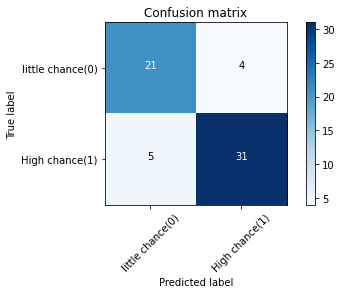

In [137]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['little chance(0)','High chance(1)'],normalize= False,  title='Confusion matrix')

print (classification_report(y_test, yhat))

 **f1\_score** 

In [138]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.8528664756135658

jaccard index for accuracy:

In [139]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=1)

0.775